## Sample Eventlog

In [72]:
import pandas as pd

INPUT_PATH = "merged_log.csv"
eventlog = pd.read_csv("data/"+INPUT_PATH)

case_id = 'caseID'
timestamp = 'Zeitpunkt'

eventlog[timestamp] = pd.to_datetime(eventlog[timestamp])
eventlog.head()

,caseID,BTN,fahrzeug_nummer,Funkadresse,Odometer,Zeitpunkt,BTN_sequence,Anzahl_der_Telegramme,LAT,LON,LAT_SOLL,LON_SOLL,Linie,Route,LSANR
0,54_17_146_200317_40879020,5840,9165,833,45677,2020-03-17 08:53:48,5840__5841__5842_,3,"48,10984167","11,58868167","48,109819","11,588789",54,17,146
1,54_17_146_200317_40879020,5841,9165,833,45767,2020-03-17 08:53:58,5840__5841__5842_,3,"48,11000333","11,587605","48,109972","11,587744",54,17,146
2,54_17_146_200317_40879020,5842,9165,833,45910,2020-03-17 08:54:15,5840__5841__5842_,3,"48,11053167","11,58568667","48,110481","11,58587",54,17,146
3,54_17_1142_200317_40879020,45680,9165,833,46014,2020-03-17 08:54:27,45680__45681__45682_,3,"48,11089167","11,58437667","48,110845","11,58455",54,17,1142
4,54_17_1142_200317_40879020,45681,9165,833,46151,2020-03-17 08:54:41,45680__45681__45682_,3,"48,11135","11,58279167","48,111312","11,582909",54,17,1142


In [73]:

print(len(eventlog), 'events')
print(len(eventlog[case_id].unique()), 'cases')


gp = eventlog.groupby([case_id])[timestamp].max().to_frame(name = 'max_t').reset_index()
gp['min_t']= eventlog.groupby([case_id])[timestamp].min().to_frame(name = 'min_t').reset_index()['min_t']

eventlog_start = gp['min_t'].min()
eventlog_end = gp['max_t'].max()
eventlog_duration = eventlog_end-eventlog_start

print("Times between", eventlog_start, '&', eventlog_end) 
print('Lasting', eventlog_duration)
gp.head()

70311 events
20721 cases
Times between 2020-03-17 01:23:48 & 2020-03-18 01:44:01
Lasting 1 days 00:20:13


,caseID,max_t,min_t
0,154_1_1069_200317_40681883,2020-03-17 05:58:00,2020-03-17 05:57:07
1,154_1_1069_200317_40681885,2020-03-17 07:52:25,2020-03-17 07:51:26
2,154_1_1069_200317_40681887,2020-03-17 09:41:11,2020-03-17 09:40:17
3,154_1_1069_200317_40681889,2020-03-17 11:31:01,2020-03-17 11:30:09
4,154_1_1069_200317_40681891,2020-03-17 13:25:25,2020-03-17 13:23:47


/var/folders/d0/btmbyskx4t106_l2zghzln2w0000gn/T/ipykernel_2560/2227305424.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


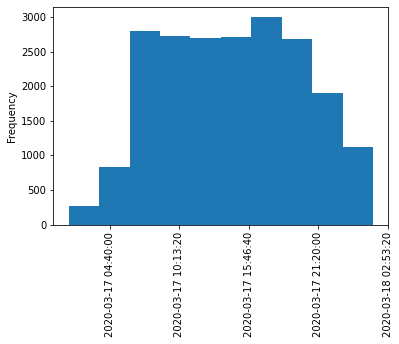

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
gp["min_t"].astype(np.int64).plot.hist(ax=ax)
labels = ax.get_xticks().tolist()
labels = pd.to_datetime(labels)
ax.set_xticklabels(labels, rotation=90)
plt.show()


In [75]:
window_size = 0.3 #What percentage of duration should be kept in log? Window always start at eventlog_start
upper_bound = eventlog_end-eventlog_duration*(1-window_size)

sample = eventlog[eventlog[timestamp]<upper_bound]
sample.head()
print(round(len(sample)/len(eventlog)*100,2),'% of log,', len(sample), 'events')
print(round(len(sample[case_id].unique())/len(eventlog[case_id].unique())*100,2),'% of log,', len(sample), 'cases')
sample.head()

18.64 % of log, 13108 events
18.81 % of log, 13108 cases


,caseID,BTN,fahrzeug_nummer,Funkadresse,Odometer,Zeitpunkt,BTN_sequence,Anzahl_der_Telegramme,LAT,LON,LAT_SOLL,LON_SOLL,Linie,Route,LSANR
21,54_18_211_200317_40879018,8460,9165,833,39345,2020-03-17 08:20:26,8460__8461__8462_,3,"48,11686","11,53621833","48,116848","11,536226",54,18,211
22,54_18_211_200317_40879018,8461,9165,833,39476,2020-03-17 08:20:52,8460__8461__8462_,3,"48,11685333","11,538125","48,116845","11,538007",54,18,211
23,54_18_211_200317_40879018,8462,9165,833,39631,2020-03-17 08:21:12,8460__8461__8462_,3,"48,11648","11,54008833","48,116562","11,540002",54,18,211
24,54_18_707_200317_40879018,28304,9165,833,39676,2020-03-17 08:22:10,28304__28305__28306__28302_,4,"48,11599333","11,54011333","48,115948","11,540066",54,18,707
25,54_18_707_200317_40879018,28305,9165,833,39805,2020-03-17 08:22:25,28304__28305__28306__28302_,4,"48,114895","11,53963833","48,114867","11,539671",54,18,707


In [76]:
OUTPUT_PATH = "sample_"+INPUT_PATH
sample.to_csv("data/"+OUTPUT_PATH, index=False)